In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from keras import models
from keras import layers
import matplotlib.pyplot as plt

Using TensorFlow backend.


Verover de data. Het is een dataset van IMDB met filmrecensies. De labels zijn binair en geven aan of een film wel of geen aanrader is volgens de reviews.

In [2]:
from keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=10000,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=42,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

bekijk de geimporteerde data.

In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [4]:
print(X_train[0:3])

[list([1, 11, 4079, 11, 4, 1986, 745, 3304, 299, 1206, 590, 3029, 1042, 37, 47, 27, 1269, 2, 7637, 19, 6, 3586, 15, 1367, 3196, 17, 1002, 723, 1768, 2887, 757, 46, 4, 232, 1131, 39, 107, 3589, 11, 4, 4539, 198, 24, 4, 1834, 133, 4, 107, 7, 98, 413, 8911, 5835, 11, 35, 781, 8, 169, 4, 2179, 5, 259, 334, 3773, 8, 4, 3497, 10, 10, 17, 16, 3381, 46, 34, 101, 612, 7, 84, 18, 49, 282, 167, 2, 7173, 122, 24, 1414, 8, 177, 4, 392, 531, 19, 259, 15, 934, 40, 507, 39, 2, 260, 77, 8, 162, 5097, 121, 4, 65, 304, 273, 13, 70, 1276, 2, 8, 15, 745, 3304, 5, 27, 322, 2197, 2, 2, 70, 30, 2, 88, 17, 6, 3029, 1042, 29, 100, 30, 4943, 50, 21, 18, 148, 15, 26, 5980, 12, 152, 157, 10, 10, 21, 19, 3196, 46, 50, 5, 4, 1636, 112, 828, 6, 1003, 4, 162, 5097, 2, 517, 6, 2, 7, 4, 9527, 5593, 4, 351, 232, 385, 125, 6, 1693, 39, 2383, 5, 29, 69, 5593, 5670, 6, 162, 5097, 1567, 232, 256, 34, 718, 5612, 2980, 8, 6, 226, 762, 7, 2, 7830, 5, 517, 2, 6, 3242, 7, 4, 351, 232, 37, 9, 1861, 8, 123, 3196, 2, 5612, 188, 5165

In [5]:
# Hoe lang is een vector?

len(X_train[0])

467

In [6]:
print(y_train[0:3])

[1 0 1]


Zoals je kunt zien bevat `X_train` vectoren met getallen. Elke vector staat voor een review. Elk getal staat voor een woord.

Met onderstaande code kun je een vector met getallen terugvertalen naar woorden. Run deze code.

In [7]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in X_train[0]])
decoded_review

"? in panic in the streets richard widmark plays u s navy doctor who has his week ? interrupted with a corpse that contains plague as cop paul douglas properly points out the guy died from two bullets in the chest that's not the issue here the two of them become unwilling partners in an effort to find the killers and anyone else exposed to the disease br br as was pointed out by any number of people for some reason director ? kazan did not bother to cast the small parts with anyone that sounds like they're from ? having been to new orleans where the story takes place i can personally ? to that richard widmark and his wife barbara ? ? can be ? because as a navy doctor he could be assigned there but for those that are natives it doesn't work br br but with plague out there and the news being kept a secret the new orleans ? starts a ? of the city's underworld the dead guy came off a ship from europe and he had underworld connections a new orleans wise guy played by jack palance jumps to a

In de tekst zie je een aantal vraagtekens. Een vraagteken staat in dit geval voor 'onbekend woord'.

De input is in deze vorm lastig te verwerken voor een neuraal netwerk. De getallen zijn categorische labels. Daarom gebruiken we One-hot-encoding. Helaas kan de `OneHotEncoder` uit sklearn niet overweg met deze input. Daarom maken we de input handmatig geschikt voor het neurale netwerk.

In [8]:
def vectorize_sequences(sequences, dimension=10000):
    # Maak een matrix van de vorm (len(sequences), dimension) met nullen
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # zet de juiste waarden in results[i] op 1
    return results

In [9]:
X_train = vectorize_sequences(X_train)
X_test = vectorize_sequences(X_test)

y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

Controleer of het omzetten van de data goed gegaan is

In [10]:
len(X_train[0])

10000

In [13]:
X_train[0][:10]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1.])

In [14]:
y_train[0:10]

array([1., 0., 1., 0., 0., 1., 1., 0., 1., 1.], dtype=float32)

Maak een neuraal netwerk dat met deze data overweg kan.

In [15]:
# we hebben 10000 inputs per document en 1 output
# de output is 0 of 1, dit is dus binaire classificatie, 
# daarom kiezen we een sigmoid activatiefunctie in de outputlaag

model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


Kies een loss function en optimizer en compileer het netwerk. Bedenk hierbij goed welke het meest geschikt is voor het probleem dat je aan het oplossen bent en voor de vorm van de output.

In [16]:
# de lossfunctie voor binaire classificatie met een sigmoid output is een binary_crossentropy

from keras.optimizers import Adam

model.compile(optimizer = 'rmsprop',
              metrics = ['accuracy'],
             loss = 'binary_crossentropy')

model.summary()



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


Split in train en validatieset

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 42)

In [18]:
X_train[0:10]

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [19]:
y_train[0:10]

array([0., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

Train je model model met de gemaakte train- en validatieset. 

In [20]:
verloop = model.fit(X_train, y_train,
                    epochs = 10,
                    batch_size = 5,
                    validation_data = (X_val, y_val))


Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 11s 485us/step - loss: 0.3266 - acc: 0.8676 - val_loss: 0.2637 - val_acc: 0.9004
Epoch 2/10
22500/22500 [==============================] - 8s 374us/step - loss: 0.2387 - acc: 0.9113 - val_loss: 0.2646 - val_acc: 0.8968
Epoch 3/10
22500/22500 [==============================] - 8s 364us/step - loss: 0.2194 - acc: 0.9220 - val_loss: 0.2774 - val_acc: 0.90043s - loss - ETA: 2s - loss: 0.2158 - acc: 0.
Epoch 4/10
22500/22500 [==============================] - 9s 409us/step - loss: 0.2120 - acc: 0.9277 - val_loss: 0.2930 - val_acc: 0.8912
Epoch 5/10
22500/22500 [==============================] - 11s 483us/step - loss: 0.1998 - acc: 0.9322 - val_loss: 0.3008 - val_acc: 0.8892
Epoch 6/10
22500/22500 [==============================] - 10s 435us/step - loss: 0.1892 - acc: 0.9399 - val_loss: 0.3297 - val_acc: 0.8844
Epoch 7/10
22500/22500 [==============================] - 8s 373us/step - l

Plot een learning curve. Zet de accuraatheid uit tegen de epochs en maak onderscheid tussen de training en validatie data. Wat zou volgens dit figuur het optimale aantal epochs zijn?

In [21]:
history_dict = verloop.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [22]:
acc = verloop.history['acc']
val_acc = verloop.history['val_acc']
loss = verloop.history['loss']
val_loss = verloop.history['val_loss']

epochs = range(1, len(acc) + 1)

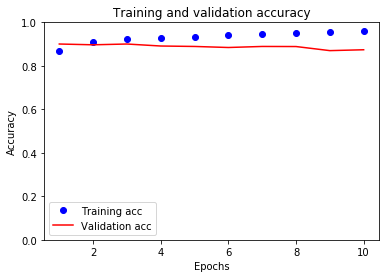

In [23]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc', color = 'red')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.legend()

plt.show()

Plot een foutcurve. Zet de loss uit tegen de epochs en maak onderscheid tussen de training en validatie data. Bekijk of er misschien sprake is van overfitting/underfitting.

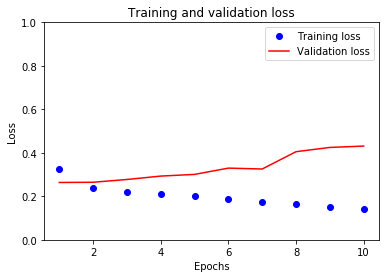

In [24]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color = 'red')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,1)
plt.legend()

plt.show()

Test je model

In [25]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

25000/25000 [==============================] - 3s 106us/step
0.86176


Kijk wat er gebeurt met de foutcurves van de train en validatiedata en met de testscore als je verschillende netwerken maakt met verschillende instellingen (aantal lagen, aantal neuronen, optimizer).

In [26]:
model = models.Sequential()

model.add(layers.Dense(256, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
              metrics = ['accuracy'],
             loss = 'binary_crossentropy')

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               2560256   
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 16)                2064      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 2,595,233
Trainable params: 2,595,233
Non-trainable params: 0
_________________________________________________________________


In [40]:
verloop = model.fit(X_train, y_train,
                    epochs = 5,
                    batch_size = 5,
                    validation_data = (X_val, y_val))

Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 68s 3ms/step - loss: 0.3452 - acc: 0.8640 - val_loss: 0.2694 - val_acc: 0.8912
Epoch 2/10
22500/22500 [==============================] - 66s 3ms/step - loss: 0.2737 - acc: 0.9089 - val_loss: 0.2807 - val_acc: 0.8768
Epoch 3/10
22500/22500 [==============================] - 67s 3ms/step - loss: 0.2531 - acc: 0.9243 - val_loss: 0.3289 - val_acc: 0.8952
Epoch 4/10
22500/22500 [==============================] - 71s 3ms/step - loss: 0.2422 - acc: 0.9328 - val_loss: 0.3460 - val_acc: 0.8936
Epoch 5/10
22500/22500 [==============================] - 71s 3ms/step - loss: 0.2323 - acc: 0.9395 - val_loss: 0.3781 - val_acc: 0.8928
Epoch 6/10
22500/22500 [==============================] - 69s 3ms/step - loss: 0.2184 - acc: 0.9439 - val_loss: 0.5133 - val_acc: 0.8872
Epoch 7/10
22500/22500 [==============================] - 67s 3ms/step - loss: 0.2172 - acc: 0.9494 - val_loss: 0.9145 - val_acc:

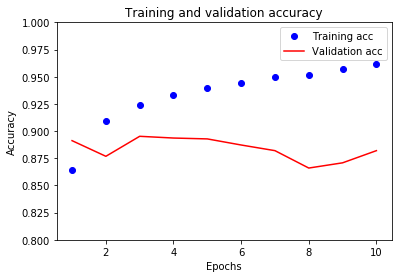

In [42]:
acc = verloop.history['acc']
val_acc = verloop.history['val_acc']
loss = verloop.history['loss']
val_loss = verloop.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc', color = 'red')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.8,1)
plt.legend()

plt.show()

In [43]:
# Dit model lijkt te overfitten, 
# na 3 epochs begint de validatiecurve te dalen en trainingsdata doet het aanzienlijk beter

In [64]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
              metrics = ['accuracy'],
             loss = 'binary_crossentropy')

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 64)                640064    
_________________________________________________________________
dense_37 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_38 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 33        
Total params: 643,233
Trainable params: 643,233
Non-trainable params: 0
_________________________________________________________________


In [65]:
verloop = model.fit(X_train, y_train,
                    epochs = 5,
                    batch_size = 256,
                    validation_data = (X_val, y_val))

Train on 22500 samples, validate on 2500 samples
Epoch 1/5
22500/22500 [==============================] - 2s 100us/step - loss: 0.3894 - acc: 0.8320 - val_loss: 0.3780 - val_acc: 0.8524
Epoch 2/5
22500/22500 [==============================] - 2s 73us/step - loss: 0.2155 - acc: 0.9175 - val_loss: 0.2660 - val_acc: 0.8868
Epoch 3/5
22500/22500 [==============================] - 2s 74us/step - loss: 0.1539 - acc: 0.9434 - val_loss: 0.2940 - val_acc: 0.8928
Epoch 4/5
22500/22500 [==============================] - 2s 74us/step - loss: 0.1064 - acc: 0.9612 - val_loss: 0.3950 - val_acc: 0.8800
Epoch 5/5
22500/22500 [==============================] - 2s 74us/step - loss: 0.0710 - acc: 0.9759 - val_loss: 0.3828 - val_acc: 0.8812


Experimenteer met dropout lagen. Welke effect heeft dit op de resultaten?

In [74]:
from keras.layers import Dropout

model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dropout(0.5))
model.add(layers.Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
              metrics = ['accuracy'],
             loss = 'binary_crossentropy')

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 64)                640064    
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_57 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_10 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_58 (Dense)             (None, 1)               

In [75]:
verloop = model.fit(X_train, y_train,
                    epochs = 5,
                    batch_size = 256,
                    validation_data = (X_val, y_val))

Train on 22500 samples, validate on 2500 samples
Epoch 1/5
22500/22500 [==============================] - 3s 149us/step - loss: 0.5340 - acc: 0.7291 - val_loss: 0.3094 - val_acc: 0.8852
Epoch 2/5
22500/22500 [==============================] - 3s 113us/step - loss: 0.3220 - acc: 0.8808 - val_loss: 0.2603 - val_acc: 0.8944
Epoch 3/5
22500/22500 [==============================] - 3s 115us/step - loss: 0.2481 - acc: 0.9144 - val_loss: 0.2725 - val_acc: 0.8964
Epoch 4/5
22500/22500 [==============================] - 3s 123us/step - loss: 0.2050 - acc: 0.9307 - val_loss: 0.2885 - val_acc: 0.8976
Epoch 5/5
22500/22500 [==============================] - 2s 79us/step - loss: 0.1766 - acc: 0.9449 - val_loss: 0.3332 - val_acc: 0.8988


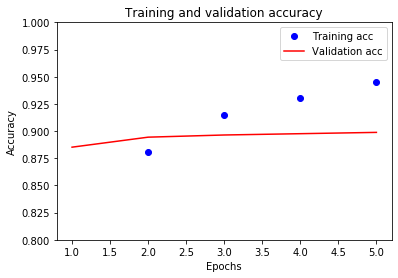

In [76]:
acc = verloop.history['acc']
val_acc = verloop.history['val_acc']
loss = verloop.history['loss']
val_loss = verloop.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc', color = 'red')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.8,1)
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)